In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import matplotlib.pyplot as plt

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)  # İlk gizli katman
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)  # İkinci gizli katman
        self.relu = nn.ReLU()  # ReLU aktivasyon fonksiyonu
        self.sigmoid = nn.Sigmoid()  # Sigmoid aktivasyon fonksiyonu
        self.fc3 = nn.Linear(hidden_size2, output_size)  # Çıkış katmanı
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

Epoch [1/50], Train Loss: 0.6448, Val Loss: 0.5711
Epoch [2/50], Train Loss: 0.5547, Val Loss: 0.5361
Epoch [3/50], Train Loss: 0.5103, Val Loss: 0.4623
Epoch [4/50], Train Loss: 0.4822, Val Loss: 0.5167
Epoch [5/50], Train Loss: 0.4687, Val Loss: 0.4406
Epoch [6/50], Train Loss: 0.4561, Val Loss: 0.4314
Epoch [7/50], Train Loss: 0.4488, Val Loss: 0.4183
Epoch [8/50], Train Loss: 0.4423, Val Loss: 0.4074
Epoch [9/50], Train Loss: 0.4382, Val Loss: 0.4174
Epoch [10/50], Train Loss: 0.4339, Val Loss: 0.4743
Epoch [11/50], Train Loss: 0.4283, Val Loss: 0.4010
Epoch [12/50], Train Loss: 0.4262, Val Loss: 0.4211
Epoch [13/50], Train Loss: 0.4230, Val Loss: 0.4136
Epoch [14/50], Train Loss: 0.4181, Val Loss: 0.3980
Epoch [15/50], Train Loss: 0.4159, Val Loss: 0.4691
Epoch [16/50], Train Loss: 0.4160, Val Loss: 0.3920
Epoch [17/50], Train Loss: 0.4094, Val Loss: 0.3913
Epoch [18/50], Train Loss: 0.4068, Val Loss: 0.4157
Epoch [19/50], Train Loss: 0.4068, Val Loss: 0.3926
Epoch [20/50], Train 

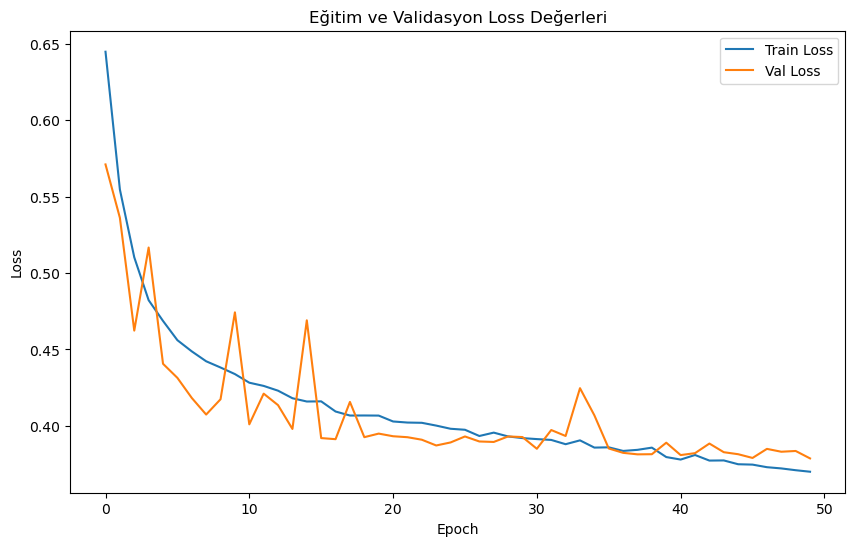

In [18]:
#Veri dosyalarının yollarını belirleyin
train_file = "cure_the_princess_train.csv"
val_file = "cure_the_princess_validation.csv"
test_file = "cure_the_princess_test.csv"


#Veri kümesini yükleyin
train_df = pd.read_csv(train_file)
val_df = pd.read_csv(val_file)
test_df = pd.read_csv(test_file)

trainx = torch.tensor(train_df.drop(['Cured'], axis=1).values, dtype=torch.float32)
trainy = torch.tensor(train_df['Cured'].values, dtype=torch.float32)
validx = torch.tensor(val_df.drop(['Cured'], axis=1).values, dtype=torch.float32)
validy = torch.tensor(val_df['Cured'].values, dtype=torch.float32)

train_ds = TensorDataset(trainx, trainy)
valid_ds = TensorDataset(validx, validy)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
validation_loader = DataLoader(valid_ds, batch_size=16)


#Veri setinin boyutlarına göre input_size ve output_size değerlerini güncelleyin
# Giriş veri boyutunu hesapla
input_size = len(train_df.columns) - 1

# Çıkış veri boyutunu hesapla
output_size = len(train_df.iloc[:, -1].unique())

# SEED değerini set edin
SEED = 190401063
torch.manual_seed(SEED)

# MLP modelini oluşturun
model = MLP(input_size, 100, 50, output_size)  # Örnek olarak hidden_size1=100, hidden_size2=50 olarak tanımlanmıştır

# Loss fonksiyonunu tanımlayın (Cross Entropy)
criterion = nn.CrossEntropyLoss()

# Optimizer'ı tanımlayın (SGD)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Eğitim ve validasyon döngülerini başlatın
num_epochs = 50  # Epoch sayısını kendiniz belirleyebilirsiniz
train_losses = []
val_losses = []



for epoch in range(1, num_epochs + 1):
    # Eğitim modunu açın
    model.train()
    train_loss = 0.0
    
for epoch in range(1, num_epochs + 1):
    # Eğitim modunu açın
    model.train()
    train_loss = 0.0
    
    # Eğitim verilerini batch'ler halinde alın
    for batch_idx, (data, target) in enumerate(train_loader):
        # Verileri ve etiketleri tensorlere dönüştürün
        data = torch.Tensor(data)
        target = torch.Tensor(target).long()
        
        # Gradyanları sıfırlayın
        optimizer.zero_grad()
        
        # Verileri modele giriş yapın
        output = model(data)
        
        # Loss değerini hesaplayın
        loss = criterion(output, target)
        
        # Loss değerini geriye yayın
        loss.backward()
        
        # Gradyanları güncelleyin
        optimizer.step()
        
        # Batch loss'unu toplayın
        train_loss += loss.item()
    
    # Epoch loss'unu kaydedin
    train_losses.append(train_loss / len(train_loader))
    
    # Validasyon modunu açın
    model.eval()
    val_loss = 0.0
    
    # Validasyon verilerini batch'ler halinde alın
    with torch.no_grad():
        for data, target in validation_loader:
            # Verileri ve etiketleri tensorlere dönüştürün
            data = torch.Tensor(data)
            target = torch.Tensor(target).long()
            
            # Verileri modele giriş yapın
            output = model(data)
            
            # Loss değerini hesaplayın
            loss = criterion(output, target)
            
            # Batch loss'unu toplayın
            val_loss += loss.item()
    
    # Epoch loss'unu kaydedin
    val_losses.append(val_loss / len(validation_loader))
    
    # Epoch sonuçlarını yazdırın
    print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}'.format(
        epoch, num_epochs, train_losses[-1], val_losses[-1]))
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Eğitim ve Validasyon Loss Değerleri')
plt.show()